In [162]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from matplotlib.patches import CirclePolygon

In [163]:
image_file = 'images/trees.jpg'
# color weights 
rw,gw,bw = -1, -1, -1

In [164]:

# Load the image
image = Image.open(image_file)
image  = np.array(image)
image = (rw*image[:,:,0] + gw*image[:,:,1] + bw*image[:,:,2]).astype(np.float32)
# translate 0-1
image -= image.min()
image /= image.max()

print (image.min(), image.max())

0.0 1.0


In [243]:
from scipy.spatial.distance import cdist
def make_metal(image, Ndots, size=10,min_size=1, dist_buf=1):
    image = image[::-1,:]
    image = image.T
    Nx,Ny = image.shape
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Set the background color to light gray
    

    
    x = np.random.randint(0,Nx,Ndots)
    y = np.random.randint(0,Ny,Ndots)
    v = image[x,y]*size/2 #diameter to radius
    for i in range(Ndots):
        dist = np.sqrt((x[i]-x)**2+(y[i]-y)**2)-dist_buf
        pv = v[i]+v
        for j in np.where(dist<pv)[0]:
            if i!=j:
                if v[i]<v[j]:
                    v[i] = 0.0
                else:
                    v[j] = 0.0
    #print (v.max())
    w = np.where (v>min_size/2)
    x = x [w]
    y = y [w]
    v = v [w]
    print ("Number of circles: ", len(x))
    rectangle = plt.Rectangle((-2*size, -2*size), Nx+4*size, Ny+4*size, fc='#EEEEEE',ec='#EEEEEE')
    ax.add_patch(rectangle)
    for x_,y_,r_ in zip (x,y,v):
        ## there seems to be a bug
        circle = CirclePolygon((x_, y_), radius=r_, facecolor='black', edgecolor='black',lw=0)
        ax.add_patch(circle)
    
    
    
    # Remove the axes
    ax.set_xlim(-2*size,Nx+2*size)
    ax.set_ylim(-2*size,Ny+2*size)
    ax.axis('off')
    # Set the unit aspect
    ax.set_aspect('equal')

    # Show the plot
    plt.show()
    fig.savefig('images/metal.png',dpi=1000)

1.0
Number of circles:  8887


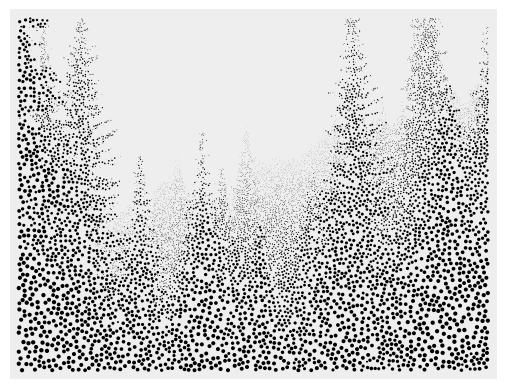

In [244]:
print ((image).max())
make_metal(image**2,50000,size=15,min_size=1)
